# Contents
1. Importing Modules & Acquiring Basic Statistics
2. Data Visualization (Scatter Plot)
3. Visualization & Dirty Implementation of Different Degrees of Polynomial Regression
4. Comparing Different Estimators with Learning Curves & Scores From K-Fold Cross-Validation
5. Selecting the Best Model (With Lowest RMSE)
6. Get the Intercept & Coefficients of the Predicted Function

#### Import Necessary Modules

In [6]:
import numpy as np
import pandas as pd
import math
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import learning_curve
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
%matplotlib inline

#### Import the Regression Table as *regdf* and Check First 10 Rows

In [2]:
regdf = pd.read_csv('regression_table.csv')
regdf.head(10)

,X,Y
0,-50.000000,-0.433374
1,-49.899900,0.526711
2,-49.799800,-0.632832
3,-49.699700,-0.235546
4,-49.599600,-0.892942
5,-49.499499,-1.537896
6,-49.399399,0.249037
7,-49.299299,-1.470464
8,-49.199199,-0.949783
9,-49.099099,0.613671


#### Get a Statistical Summary From the Dataframe

In [3]:
print('The shape of the dataframe is - {}'.format(regdf.shape))
print('The number of entries - {}'.format(regdf.size))
print('-'*60)
print('The basic statistics -\n{}'.format(regdf.describe()))
print('-'*60)
print('Unique values per column -\n{}'.format(regdf.nunique()))
print('-'*60)
print('Null values per column -\n{}'.format(regdf.isnull().sum()))
print('-'*60)
print('Data types per column -\n{}'.format(regdf.dtypes))

The shape of the dataframe is - (1000, 2)
The number of entries - 2000
------------------------------------------------------------
The basic statistics -
                  X            Y
count  1.000000e+03  1000.000000
mean   1.818989e-15    -0.056852
std    2.891085e+01     0.951317
min   -5.000000e+01    -3.565291
25%   -2.500000e+01    -0.682682
50%    3.556183e-15    -0.024003
75%    2.500000e+01     0.572795
max    5.000000e+01     2.788375
------------------------------------------------------------
Unique values per column -
X    1000
Y    1000
dtype: int64
------------------------------------------------------------
Null values per column -
X    0
Y    0
dtype: int64
------------------------------------------------------------
Data types per column -
X    float64
Y    float64
dtype: object


#### Generate a Scatter Plot to Visualize the Pattern of the Data

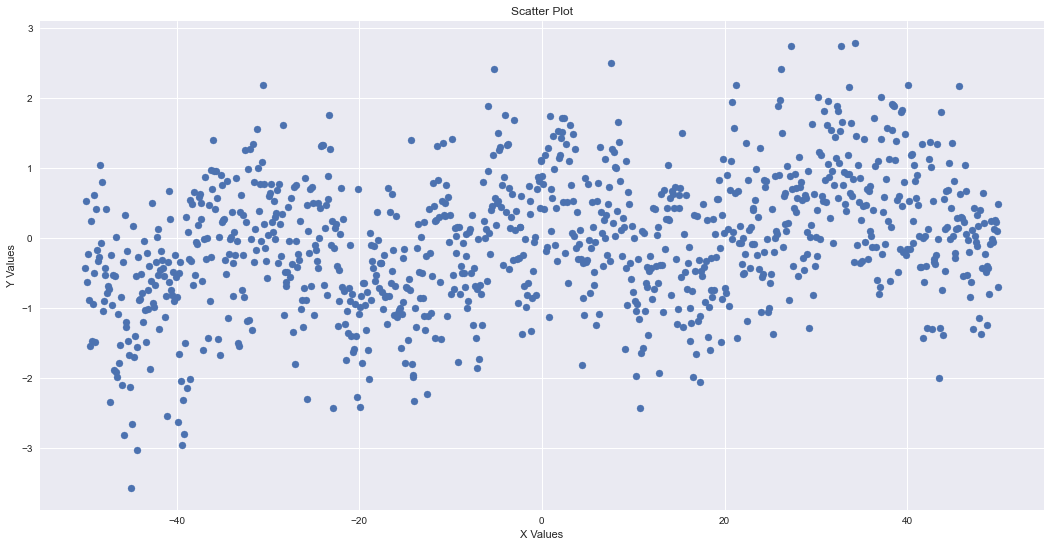

In [4]:
plt.figure(figsize=(18, 9))
plt.style.use('seaborn')
plt.scatter(regdf.X, regdf.Y)
plt.title('Scatter Plot')
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.show()

#### A Quick Implementation of Different Order Polynomial Regression Models
Choose the highest order of polynomials *(degree)* upto which we want to fit our model & visualize. Then plot the predicted values using trained polynomial regression models along with depicting their $r^{2}$ scores

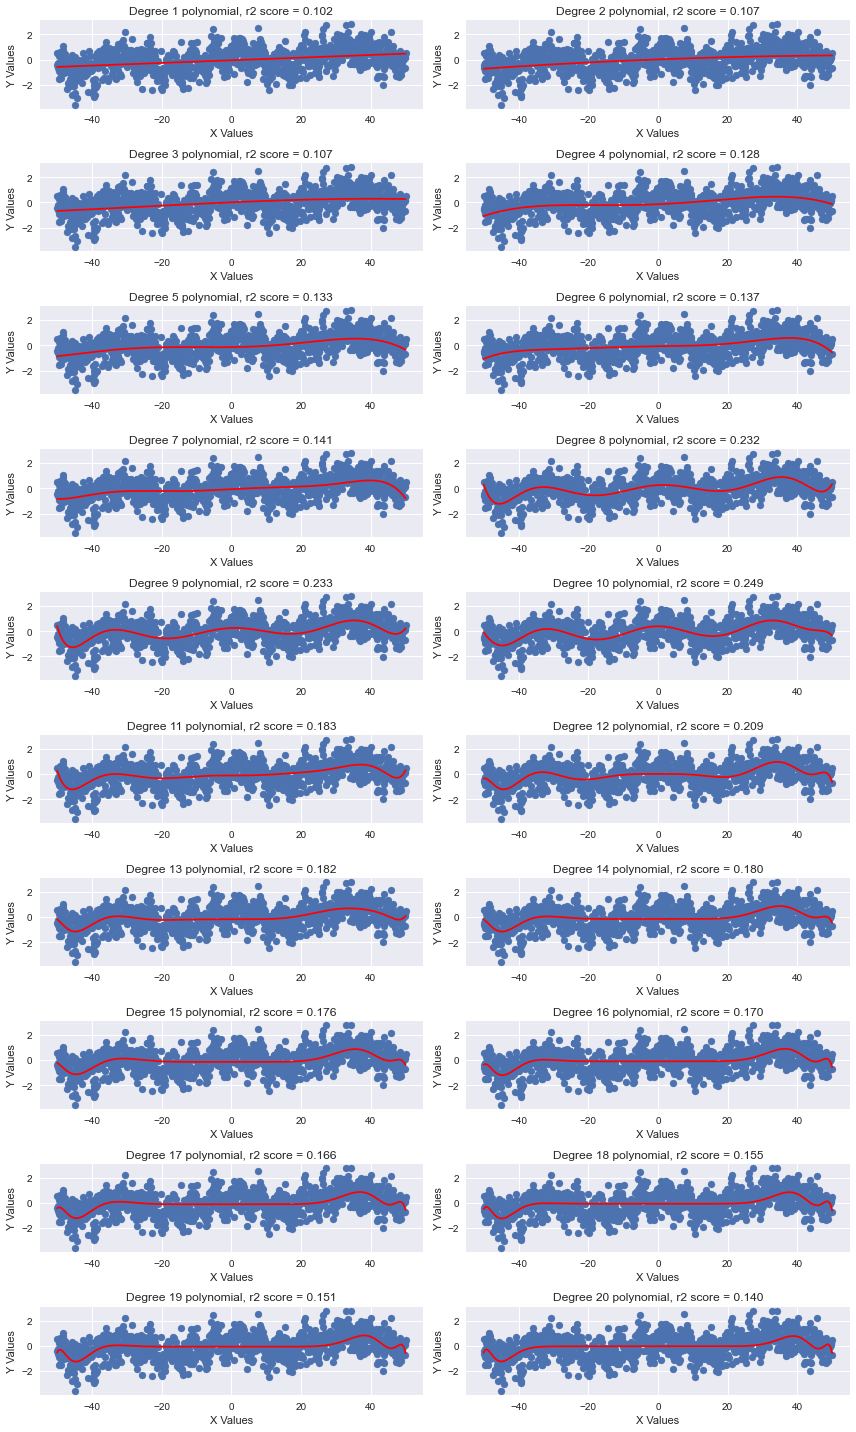

In [7]:
degree = 20
fig, ax = plt.subplots(math.ceil(degree/2),2, figsize=(12, 20))
ax=ax.flatten()           # Converting multidimensional array into a regular "single" dimensional array.
poly_x = []
model = []
for i in range(degree):
                          # Create and store each model into "model" and polynomial features into "poly_x"
    poly_reg = PolynomialFeatures(degree=i+1)
    x = poly_reg.fit_transform(regdf[['X']])
    poly_x.append(x)
    model.append(LinearRegression())
    model[i].fit(x, regdf['Y'])
    # Plot the predicted regression curve on the scatterplot of feature and target variable
    ax[i].scatter(regdf.X, regdf.Y)
    ax[i].plot(regdf['X'], model[i].predict(x), color='r')
    ax[i].set_xlabel('X Values')
    ax[i].set_ylabel('Y Values')
    # Include r2 score in title
    ax[i].set_title('Degree {} polynomial, r2 score = {:.3f}'.format(i+1, r2_score(regdf['Y'], model[i].predict(x))))

fig.tight_layout()        # Automatically adjust subplot parameters to give specified padding

#### Comparing Performances of Different Estimators
K-fold Cross-Validation is used to train & validate each model. Learning curve was plotted for each model to understand the training and validation error changes with increasing training set size. Also, learning curves would help to diagnose if there is overfitting or underfitting issues.
20 different models were generated and 20-fold cross-validation was chosen to fit the models and calculate the error metrics. Root Mean Squared Error *(RMSE)* is used as the error metric in calculation. Large value of *k* is used because - 
1. The sample size is small 
2. To keep the training set large enough in order to get a good fit.

Degree=1
train sizes = [150 300 450 600 800 950]
train error = [0.93255263 0.92090022 0.90971658 0.90388058 0.90597789 0.90043964]
validation error = [2.00114279 1.20703603 0.91406748 0.94764933 0.91499804 0.91700488]
------------------------------
Degree=2
train sizes = [150 300 450 600 800 950]
train error = [0.87886337 0.89427807 0.90535514 0.90176279 0.9049612  0.89807924]
validation error = [73.43431503  7.62942406  2.01420468  0.99743554  0.92716532  0.92134151]
------------------------------
Degree=3
train sizes = [150 300 450 600 800 950]
train error = [0.87525908 0.85487014 0.8876267  0.89904877 0.89514275 0.89757531]
validation error = [191.81931565 129.85930336  11.57603905   2.92942865   0.94468008
   0.93538225]
------------------------------
Degree=4
train sizes = [150 300 450 600 800 950]
train error = [0.87429519 0.84085591 0.86365925 0.88672426 0.8935355  0.88720216]
validation error = [2.06317291e+03 2.52444442e+02 1.37669341e+02 6.59509708e+00
 9.55595704e-01 9.29037

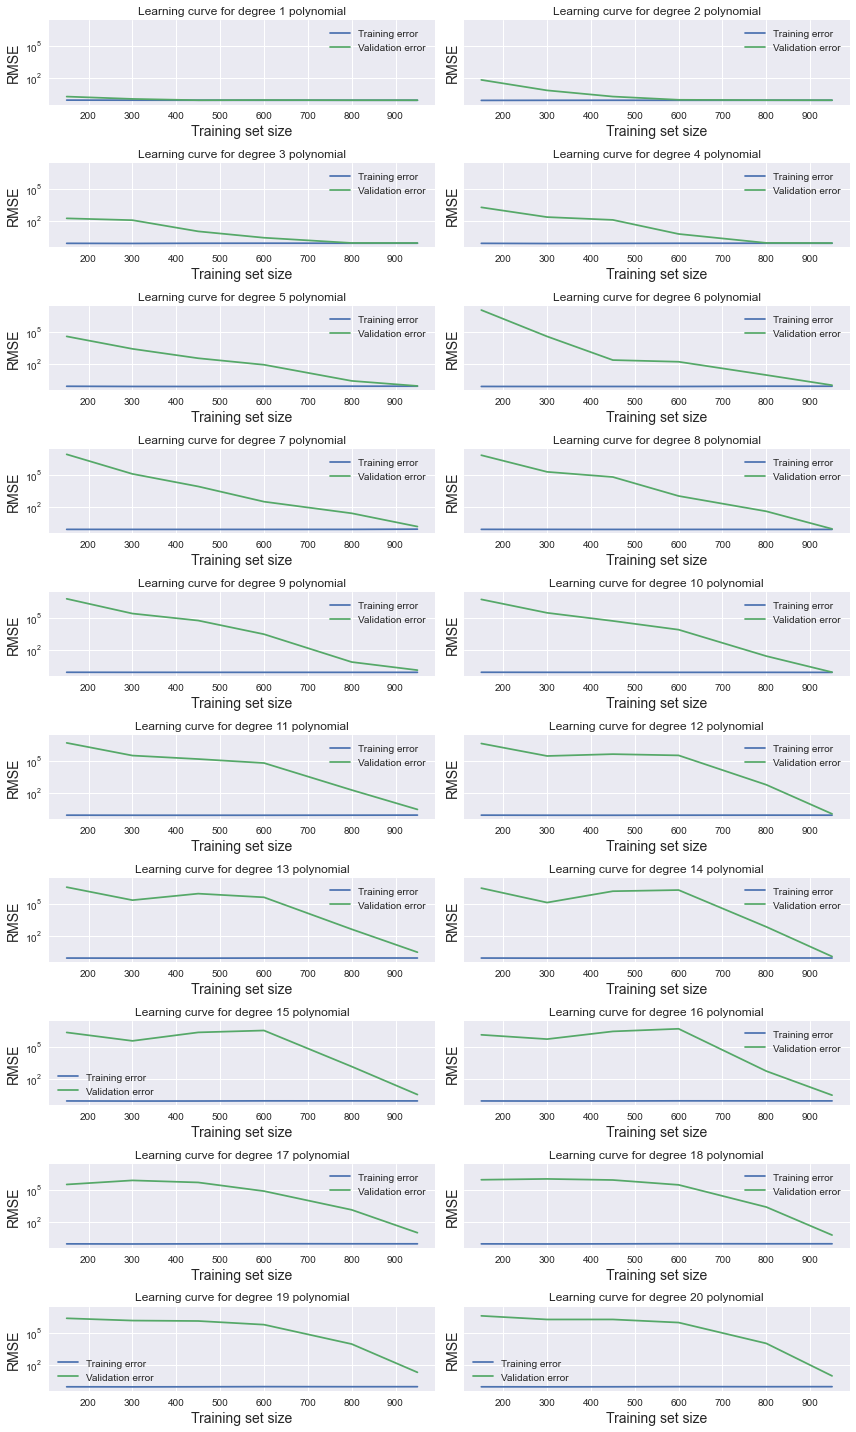

In [8]:
degree = 20
fig, ax = plt.subplots(math.ceil(degree/2),2, figsize=(12, 20), sharey=True)
ax=ax.flatten()
plt.style.use('seaborn')
train_sizes = [150, 300, 450, 600, 800, 950]  # Specify absolute sizes of the training sets for calculating scores
K = 20                                        # Choosing K for K-Fold Cross-Validation
estimator = LinearRegression()
rmseval = []
rmsetrain = []
for i in range(20):
    # Generate "i+1"th degree polynomial features to train model
    poly_reg = PolynomialFeatures(degree=i+1)
    x = poly_reg.fit_transform(regdf[['X']])
    # Get scores on training and validation sets at predetermined training sizes
    train_sizes, train_scores, validation_scores = learning_curve(estimator = estimator, X = x, y = regdf['Y'], cv = K, train_sizes=train_sizes, scoring = 'neg_mean_squared_error')
    # Get the mean training and validation scores of different training or validation sets for each training size
    train_scores_mean = np.sqrt(-train_scores.mean(axis = 1))           # Also MSE is converted to RMSE
    validation_scores_mean = np.sqrt(-validation_scores.mean(axis = 1)) # Also MSE is converted to RMSE
    # Store the mean training and validation scores for the final(6th) training size
    rmseval.append(validation_scores_mean[5])
    rmsetrain.append(train_scores_mean[5])
    # Display error metrics for different regression models
    print('Degree={}'.format(i+1))
    print('train sizes = {}'.format(train_sizes))
    print('train error = {}'.format(train_scores_mean))
    print('validation error = {}'.format(validation_scores_mean))
    print('-'*30)
    # Plot learning curve
    ax[i].plot(train_sizes, train_scores_mean, label = 'Training error')
    ax[i].plot(train_sizes, validation_scores_mean, label = 'Validation error')
    ax[i].set_yscale('log')
    ax[i].set_ylabel('RMSE', fontsize = 14)
    ax[i].set_xlabel('Training set size', fontsize = 14)
    ax[i].legend()
    ax[i].set_title('Learning curve for degree {} polynomial'.format(i+1))

fig.tight_layout()

#### Get the Parameters of Predicted $n^{th}$ Degree Polynomial Function
Since the results show best performance for using $10^{th}$ order polynomial, we find the coefficients and intercept terms for the model.
10th degree polynomial function with one parameter is - 

>*y=f(x)=ax+b$x^{2}$+c$x^{3}$+d$x^{4}$+e$x^{5}$+f$x^{6}$+g$x^{7}$+h$x^{8}$+i$x^{9}$+j$x^{9}$+k*

Here, the coefficients are from a-j and intercept is k.

[Note: The coefficients and intercept are collected from a previously trained model using all the sample data.]

In [10]:
n = 10
intercept = model[n-1].intercept_
coefficient = model[n-1].coef_[1:]
print('Intercept : {}\nCoefficient : {}'.format(intercept, coefficient))

Intercept : 0.3948964192890426
Coefficient : [ 6.26157001e-05 -7.80321302e-03  4.55997861e-05  2.13311670e-05
 -7.00751915e-08 -2.00899521e-08  4.44742992e-11  7.72519414e-12
 -9.56858392e-15 -1.04740706e-15]
